<a href="https://colab.research.google.com/github/just-fahri/kelompok_2_pengolahan_citra/blob/main/LadiaNoni14012200180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [5]:
from google_play_scraper import reviews, Sort
import csv

result, _ = reviews(
    'id.go.pajak.djp',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=500,
    filter_score_with=None
)

filename = 'ulasan_google_play.csv'


with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['userName', 'score', 'at', 'content'])
    writer.writeheader()
    for review in result:

        writer.writerow({
            'userName': review['userName'],
            'score': review['score'],
            'at': review['at'],
            'content': review['content']
        })

print(f"Berhasil menyimpan {len(result)} ulasan ke '{filename}'")


Berhasil menyimpan 500 ulasan ke 'ulasan_google_play.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


              userName  score                   at  \
0      Zoky FrenzzkyGo      1  2025-12-11 13:10:19   
1     Bayu lesmana elc      1  2025-12-11 06:26:20   
2         Rijal Juniar      1  2025-12-11 00:32:34   
3               maulia      1  2025-12-10 15:48:52   
4  perwira simanjuntak      1  2025-12-10 06:41:53   

                                             content  
0                          jelek banget error terus.  
1                                   tidak bisa login  
2  klo bikin aplikasi yang bener napa ketimbang u...  
3                                           jelek 👎🤟  
4  deplover ga jelas, ada gak ada aplikasi sama a...  
              userName  score                   at  \
0      Zoky FrenzzkyGo      1  2025-12-11 13:10:19   
1     Bayu lesmana elc      1  2025-12-11 06:26:20   
2         Rijal Juniar      1  2025-12-11 00:32:34   
3               maulia      1  2025-12-10 15:48:52   
4  perwira simanjuntak      1  2025-12-10 06:41:53   

                    

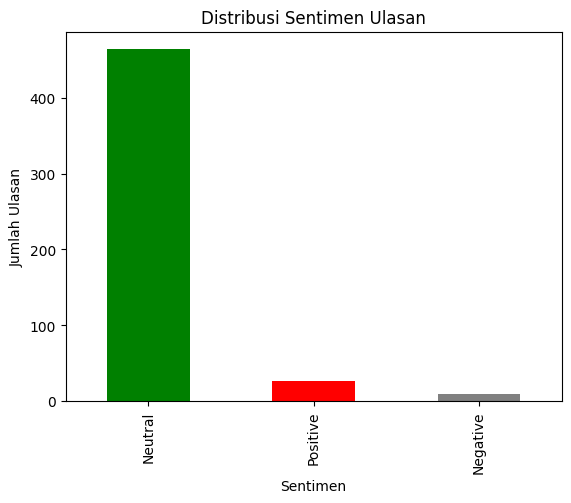

In [6]:
!pip install pandas textblob matplotlib nltk

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Uncommenting as suggested by LookupError

df = pd.read_csv("ulasan_google_play.csv") # Corrected filename
print(df.head()) # Fixed SyntaxError: missing parenthesis

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    tokens = word_tokenize(text)
    # Corrected stopwords language to 'indonesian'
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]
    return ' '.join(tokens)

df['clean_content'] = df['content'].apply(clean_text) # Corrected column name to 'content'


def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_content'].apply(sentiment)

print(df.head())
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Distribusi Sentimen Ulasan") # Updated title for context
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()